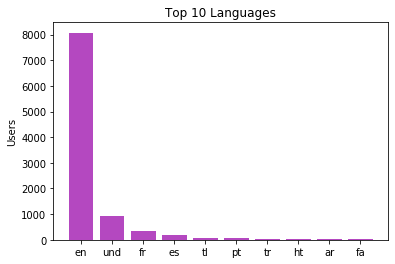

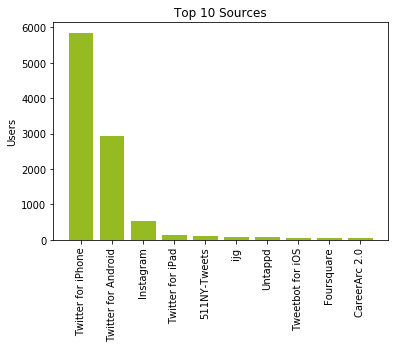

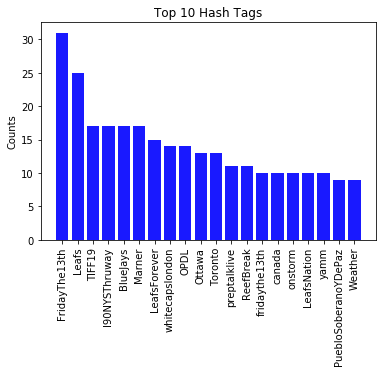

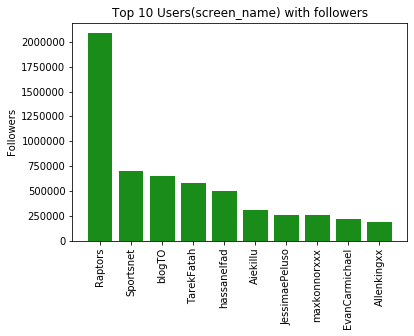

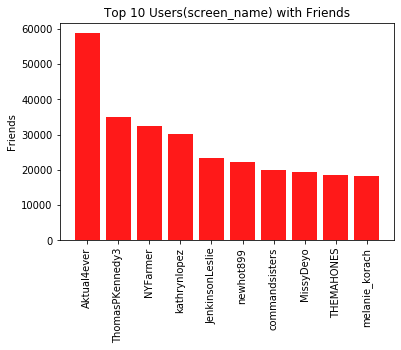

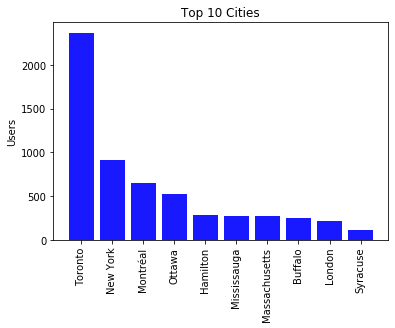

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:186: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:189: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:190: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


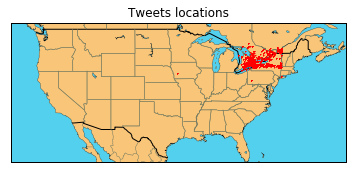

In [20]:
import pymongo
import collections
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

if __name__ == "__main__":
    from pymongo import MongoClient

    client = MongoClient("mongodb://192.168.99.100:27017")

    db = client.dbtwitter
    
    datalist = []
    langlist = []
    sourcelist = []
    hashlist = []
    followdict = {}
    frdsdict = {}
    coordlist = []
    
    placelist = []
    
    cursor = db.tbcanada.find()
    for document in cursor:
        rowlist = []
        rowlist = [document.get('lang'), document.get('filter_level'),document.get('user')['screen_name'], 
                   document.get('user')['followers_count'], document.get('user')['friends_count'],
                   document.get('user')['favourites_count'], document.get('user')['statuses_count'],
                   document.get('user')['profile_background_color'], 
                   document.get('place')['bounding_box']['coordinates'],
                   document.get('place')['attributes'], document.get('entities')['hashtags'],
                   document.get('source')
                  ]

        datalist.append(rowlist)
        
        langlist.append(document.get('lang')) 
        sourcelist.append(document.get('source')) 
        hashlist.append(document.get('entities')['hashtags']) 
        followdict.update({document.get('user')['screen_name']:document.get('user')['followers_count']})
        frdsdict.update({document.get('user')['screen_name']:document.get('user')['friends_count']})
        coordlist.append(document.get('place')['bounding_box']['coordinates'][0][0])
        placelist.append(document.get('place')['name']) 
            
#------------------------------------------------------------ 
#----- Top 10 Languages -------------------------------------
#------------------------------------------------------------ 

    counter1=collections.Counter(langlist)

    langtype = []
    langtypecnt = []
    for i,j in counter1.most_common(10):
        langtype.append(i)
        langtypecnt.append(j)
    
    y_pos = np.arange(len(langtype))

    plt.bar(y_pos, langtypecnt, align='center', alpha=0.9, color='#AC34B9')
    plt.xticks(y_pos, langtype)
    plt.ylabel('Users')
    plt.title('Top 10 Languages')

    plt.show()
#------------------------------------------------------------ 
#----- Top 10 Sources ---------------------------------------
#------------------------------------------------------------ 
    counter2=collections.Counter(sourcelist)
    sourcetype = []
    sourcetypecnt = []
    for i,j in counter2.most_common(10):
        s = i.find('>')
        e = i.find('</a>')
        
        sourcetype.append(i[s+1:e])
        sourcetypecnt.append(j)
    y_pos = np.arange(len(sourcetype))

    plt.bar(y_pos, sourcetypecnt, align='center', alpha=0.9, color='#8BB309')
    plt.xticks(y_pos, sourcetype,rotation=90)
    plt.ylabel('Users')
    plt.title('Top 10 Sources')

    plt.show()    

#------------------------------------------------------------ 
#----- Top 10 Hash Tags -------------------------------------
#------------------------------------------------------------     

    hashlist1 = []
    for i in hashlist:
        if i != []:
            #print(i)
            for j in range(0,len(i)):
                hashlist1.append(i[j]['text'])

    counter3=collections.Counter(hashlist1)
    hashtype = []
    hashtypecnt = []
    for i,j in counter3.most_common(20):
        hashtype.append(i)
        hashtypecnt.append(j)
    y_pos = np.arange(len(hashtype))

    plt.bar(y_pos, hashtypecnt, align='center', alpha=0.9, color='b')
    plt.xticks(y_pos, hashtype,rotation=90)
    plt.ylabel('Counts')
    plt.title('Top 10 Hash Tags')

    plt.show() 
#------------------------------------------------------------ 
#----- Top 10 Users(screen_name) with followers -------------
#------------------------------------------------------------     
    
    counter4=collections.Counter(followdict)    
    followuser = []
    followcnt = []
    for i,j in counter4.most_common(10):
        followuser.append(i)
        followcnt.append(j)
    
    y_pos = np.arange(len(followuser))

    plt.bar(y_pos, followcnt, align='center', alpha=0.9, color='g')
    plt.xticks(y_pos, followuser,rotation=90)
    plt.ylabel('Followers')
    plt.title('Top 10 Users(screen_name) with followers')

    plt.show()
    
#------------------------------------------------------------ 
#----- Top 10 Users(screen_name) with Friends ---------------
#------------------------------------------------------------     
      
    counter5=collections.Counter(frdsdict)    
    frdsuser = []
    frdscnt = []
    for i,j in counter5.most_common(10):
        frdsuser.append(i)
        frdscnt.append(j)
    
    y_pos = np.arange(len(frdsuser))

    plt.bar(y_pos, frdscnt, align='center', alpha=0.9, color='r')
    plt.xticks(y_pos, frdsuser,rotation=90)
    plt.ylabel('Friends')
    plt.title('Top 10 Users(screen_name) with Friends')

    plt.show()
    
#------------------------------------------------------------ 
#----- Top 10 Cities ----------------------------------------
#------------------------------------------------------------     
 
    counter6=collections.Counter(placelist)

    placetype = []
    placetypecnt = []
    for i,j in counter6.most_common(10):
        placetype.append(i)
        placetypecnt.append(j)
    
    y_pos = np.arange(len(placetype))

    plt.bar(y_pos, placetypecnt, align='center', alpha=0.9, color='b')
    plt.xticks(y_pos, placetype,rotation=90)
    plt.ylabel('Users')
    plt.title('Top 10 Cities')

    plt.show()
#------------------------------------------------------------ 
#----- Tweets locations -------------------------------------
#------------------------------------------------------------      
    
import os
os.environ["PROJ_LIB"] = "/opt/conda/envs/TEST/share/proj/"
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

m = Basemap(width=12000000,height=8000000,projection='mill',
            llcrnrlat = 25,
            llcrnrlon = -130,
            urcrnrlat = 50,
            urcrnrlon = -60,
            resolution='l')

m.drawcoastlines(linewidth=.25)
m.drawcountries(linewidth=1)
m.drawstates(color='#757C62')

m.fillcontinents(color='#F9C578',lake_color='#54D0EF')
m.drawmapboundary(fill_color='#54D0EF')

plt.title('Tweets locations')

for Clon, Clat in coordlist:
    xpt, ypt = m(Clon, Clat)
    m.plot(xpt, ypt, 'c+', markersize=1,color='r')
    

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  from ipykernel import kernelapp as app


Text(0.5, 1.0, 'Map locations')

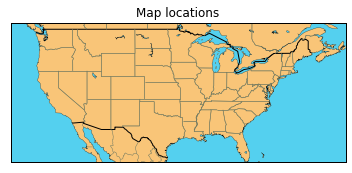

In [21]:
import os
os.environ["PROJ_LIB"] = "/opt/conda/envs/TEST/share/proj/"
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

m = Basemap(width=12000000,height=8000000,projection='mill',
            llcrnrlat = 25,
            llcrnrlon = -130,
            urcrnrlat = 50,
            urcrnrlon = -60,
            resolution='l')

m.drawcoastlines(linewidth=.25)
m.drawcountries(linewidth=1)
m.drawstates(color='#757C62')

m.fillcontinents(color='#F9C578',lake_color='#54D0EF')
m.drawmapboundary(fill_color='#54D0EF')

plt.title('Map locations')

